In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 52.6 MB/s eta 0:00:00


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,177 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pytesseract

In [ ]:
# Mount Google Drive (if your data is there)
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the directory containing your Colab file and data
%cd /content/drive/MyDrive/peru_plates_recognition/

# Check if the data is available
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/peru_plates_recognition
dataset  peru-plates-data.zip  peruvian-plates-recognition.ipynb  runs	yolov10n.pt


In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
# Unzip the data
# !unzip peru-plates-data.zip -d dataset

In [ ]:
# Load YOLOv10n model from scratch
model = YOLO("yolov10n.yaml")

In [ ]:
!ls dataset

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
# Train the model
model.train(data="/content/drive/MyDrive/peru_plates_recognition/dataset/data.yaml", epochs=100, imgsz=640, batch=64)

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.yaml, data=/content/drive/MyDrive/peru_plates_recognition/dataset/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

train: Scanning /content/drive/MyDrive/peru_plates_recognition/dataset/train/labels.cache... 1470 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1470/1470 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/peru_plates_recognition/dataset/valid/labels.cache... 138 images, 0 backgrounds, 0 corrupt: 100%|██████████| 138/138 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 240, len(boxes) = 257. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.8G      10.93      193.7      8.918        193        640: 100%|██████████| 23/23 [00:18<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all        138        257          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.6G      8.753      41.28      6.118        200        640: 100%|██████████| 23/23 [00:20<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all        138        257          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.6G      7.099      13.19      3.616        183        640: 100%|██████████| 23/23 [00:20<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all        138        257          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.7G      5.725      8.288       2.83        182        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all        138        257          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.7G      4.898      5.919      2.516        180        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all        138        257   1.64e-05    0.00246    0.00251   0.000753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.6G      4.381      4.614      2.409        195        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all        138        257      0.488      0.264      0.297      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.6G      4.127      3.786      2.243        197        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all        138        257      0.716      0.175      0.365      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.6G       3.88      3.203      2.168        188        640: 100%|██████████| 23/23 [00:14<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all        138        257      0.578      0.527      0.555      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.6G      3.765      3.004      2.122        210        640: 100%|██████████| 23/23 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        138        257      0.683      0.472      0.546      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.7G      3.577      2.834      2.071        210        640: 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        138        257      0.704      0.684       0.76      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.6G      3.468      2.529      2.023        195        640: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        138        257      0.654      0.592      0.674      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.7G      3.475      2.491       2.03        180        640: 100%|██████████| 23/23 [00:19<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        138        257      0.792      0.603      0.769      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.7G      3.384      2.385      2.005        192        640: 100%|██████████| 23/23 [00:17<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all        138        257      0.365      0.655      0.445      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.6G      3.354      2.347      1.988        195        640: 100%|██████████| 23/23 [00:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        138        257      0.665      0.738      0.768      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.6G       3.22      2.285      1.955        190        640: 100%|██████████| 23/23 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        138        257       0.58      0.695      0.655      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.6G      3.205       2.23      1.943        151        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all        138        257      0.793      0.736      0.814      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.7G        3.2      2.214      1.951        194        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all        138        257      0.764      0.787      0.829      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.7G      3.152      2.144      1.945        189        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        138        257      0.727      0.754      0.776      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.6G      3.122      2.187      1.934        205        640: 100%|██████████| 23/23 [00:17<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        138        257      0.666      0.638      0.702      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.7G      3.085      2.058      1.921        184        640: 100%|██████████| 23/23 [00:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all        138        257      0.748      0.695      0.814      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.6G      3.018      2.069      1.883        189        640: 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all        138        257      0.676      0.677      0.715      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.6G      2.984      2.086      1.886        207        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        138        257      0.482      0.622      0.597       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.6G      3.064      2.045      1.885        196        640: 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all        138        257      0.651      0.668      0.717       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.6G      2.959      2.018      1.901        181        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        138        257      0.672      0.776      0.806      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.7G      3.015      2.091      1.895        218        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all        138        257      0.698      0.698      0.763      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.6G      2.942       2.01      1.877        220        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all        138        257      0.868      0.638      0.801      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.7G      2.909      1.928      1.854        197        640: 100%|██████████| 23/23 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all        138        257      0.697      0.784      0.825      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.6G      2.912      1.933      1.871        212        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all        138        257      0.781      0.745      0.832      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.6G       2.88      1.969      1.888        197        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all        138        257      0.769      0.833      0.853      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.6G      2.859      1.939       1.85        220        640: 100%|██████████| 23/23 [00:17<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        138        257      0.714      0.834      0.846      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.6G      2.848      1.907      1.855        236        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all        138        257      0.728      0.793      0.825       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.6G      2.839      1.908      1.835        212        640: 100%|██████████| 23/23 [00:19<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all        138        257      0.815      0.817      0.862      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.6G      2.801      1.919      1.853        180        640: 100%|██████████| 23/23 [00:17<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all        138        257      0.751      0.813      0.852      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.6G      2.825       1.93      1.861        162        640: 100%|██████████| 23/23 [00:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all        138        257      0.728      0.815      0.792      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.6G      2.798      1.876      1.846        176        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all        138        257      0.816      0.744      0.837      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.6G      2.778      1.867      1.849        195        640: 100%|██████████| 23/23 [00:16<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        138        257      0.788      0.813      0.851       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.6G      2.748      1.858      1.838        167        640: 100%|██████████| 23/23 [00:16<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all        138        257       0.81      0.817      0.859      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.7G      2.756      1.854      1.845        189        640: 100%|██████████| 23/23 [00:18<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        138        257      0.738      0.808      0.838       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.6G      2.708      1.865      1.833        178        640: 100%|██████████| 23/23 [00:17<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all        138        257      0.824      0.722      0.825      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.7G      2.698      1.815      1.807        220        640: 100%|██████████| 23/23 [00:16<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        138        257       0.77      0.738      0.803      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.6G      2.721      1.829       1.83        188        640: 100%|██████████| 23/23 [00:20<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all        138        257      0.727      0.751      0.778      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.6G      2.767      1.859      1.835        207        640: 100%|██████████| 23/23 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all        138        257      0.773      0.811      0.855      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.6G      2.664      1.805      1.818        206        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all        138        257      0.769      0.764      0.834      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.6G      2.737      1.851      1.828        164        640: 100%|██████████| 23/23 [00:20<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        138        257      0.643      0.617      0.724      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.6G      2.678      1.808      1.814        172        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all        138        257      0.835      0.748      0.852      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.7G      2.656      1.807      1.801        203        640: 100%|██████████| 23/23 [00:17<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all        138        257      0.817       0.78      0.845      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.6G      2.656      1.829      1.816        164        640: 100%|██████████| 23/23 [00:15<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        138        257      0.782      0.745      0.823      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.6G      2.593      1.782      1.816        226        640: 100%|██████████| 23/23 [00:17<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all        138        257      0.797      0.713      0.822      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.6G      2.646      1.787      1.797        176        640: 100%|██████████| 23/23 [00:18<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        138        257      0.761      0.833      0.859      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.6G       2.65      1.763      1.818        224        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        138        257      0.782      0.793      0.846      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.7G      2.637      1.746      1.819        200        640: 100%|██████████| 23/23 [00:17<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        138        257      0.861      0.774      0.878      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.6G      2.629      1.758      1.795        169        640: 100%|██████████| 23/23 [00:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all        138        257      0.808      0.821      0.877      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.6G      2.645      1.803      1.808        181        640: 100%|██████████| 23/23 [00:20<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        138        257      0.792      0.706      0.814      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.7G        2.6      1.796      1.798        195        640: 100%|██████████| 23/23 [00:19<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        138        257      0.776      0.822      0.841      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.6G      2.574      1.703      1.785        194        640: 100%|██████████| 23/23 [00:16<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all        138        257      0.843        0.8       0.87      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.6G      2.625      1.707      1.789        168        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        138        257       0.83      0.871      0.874      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.6G      2.561      1.735       1.78        216        640: 100%|██████████| 23/23 [00:15<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all        138        257      0.824      0.834      0.878      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.6G      2.597      1.735      1.787        212        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all        138        257      0.544      0.601      0.605      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.7G      2.558       1.71      1.788        172        640: 100%|██████████| 23/23 [00:19<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all        138        257      0.809      0.849      0.877      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.6G      2.611      1.766      1.786        204        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        138        257      0.834      0.788      0.841      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.6G      2.548      1.749      1.787        190        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        138        257        0.8      0.834      0.851       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.6G      2.532       1.72      1.796        194        640: 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all        138        257      0.834      0.782      0.869      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.7G      2.578       1.69      1.783        228        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all        138        257      0.881      0.795      0.866      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.6G      2.529      1.714      1.795        176        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        138        257      0.851      0.864      0.879      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.6G      2.503      1.688       1.78        164        640: 100%|██████████| 23/23 [00:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all        138        257      0.805      0.814      0.856      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.7G      2.542      1.693      1.781        191        640: 100%|██████████| 23/23 [00:19<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all        138        257      0.825      0.826      0.873      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.7G      2.518      1.684      1.788        191        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        138        257      0.812      0.815      0.859      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.6G      2.531      1.695      1.776        207        640: 100%|██████████| 23/23 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        138        257       0.84      0.824      0.866      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.7G      2.498      1.695      1.771        171        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        138        257       0.83       0.84      0.874      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.6G      2.491      1.688      1.792        210        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all        138        257      0.801      0.847      0.876      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.6G      2.509      1.644       1.78        198        640: 100%|██████████| 23/23 [00:19<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all        138        257      0.762      0.864      0.828      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.6G      2.507      1.681      1.776        199        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all        138        257      0.853      0.832      0.889      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.6G        2.5      1.671      1.772        210        640: 100%|██████████| 23/23 [00:18<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        138        257      0.836      0.818      0.898      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.6G      2.492       1.68      1.797        197        640: 100%|██████████| 23/23 [00:17<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        138        257      0.875       0.83      0.896      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.6G      2.469      1.658      1.764        229        640: 100%|██████████| 23/23 [00:18<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        138        257      0.802      0.821       0.88      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.6G      2.486      1.679      1.777        196        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all        138        257      0.847      0.855      0.903      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.6G      2.482      1.676      1.757        194        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all        138        257      0.866      0.793      0.893      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.6G      2.446      1.654      1.769        184        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all        138        257      0.825      0.832      0.853       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.7G      2.498      1.665       1.78        190        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all        138        257      0.789      0.848      0.877       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.6G      2.442      1.649       1.77        220        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all        138        257      0.785      0.835      0.868      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.6G      2.429      1.626      1.753        164        640: 100%|██████████| 23/23 [00:14<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all        138        257      0.871      0.809      0.854      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.6G      2.435      1.659      1.779        174        640: 100%|██████████| 23/23 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        138        257       0.83      0.854      0.885      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.6G      2.438       1.64      1.745        193        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all        138        257      0.795      0.849      0.851      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.6G      2.431      1.632      1.753        218        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        138        257      0.821      0.855       0.88      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.6G      2.411      1.618      1.759        188        640: 100%|██████████| 23/23 [00:18<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        138        257      0.834      0.862       0.88      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.6G      2.411      1.659      1.761        212        640: 100%|██████████| 23/23 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        138        257      0.847      0.866      0.884      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.6G       2.42      1.635      1.773        201        640: 100%|██████████| 23/23 [00:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        138        257      0.806      0.854      0.868      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.6G      2.397      1.618      1.741        194        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        138        257      0.804      0.837      0.884      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.6G      2.398       1.61      1.775        174        640: 100%|██████████| 23/23 [00:16<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        138        257      0.802      0.857       0.89      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.7G      2.418      1.633      1.753        197        640: 100%|██████████| 23/23 [00:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        138        257      0.786      0.838       0.87      0.593


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.6G      2.262      1.609      1.759        128        640: 100%|██████████| 23/23 [00:17<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        138        257      0.839      0.833      0.894      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.6G      2.254      1.585      1.754        113        640: 100%|██████████| 23/23 [00:17<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all        138        257      0.824      0.838       0.89      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.6G      2.261      1.579      1.762        119        640: 100%|██████████| 23/23 [00:14<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        138        257      0.854      0.868      0.889      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.6G      2.239      1.578      1.752        111        640: 100%|██████████| 23/23 [00:14<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all        138        257      0.857      0.854      0.883      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.6G      2.239      1.574      1.757        116        640: 100%|██████████| 23/23 [00:14<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        138        257      0.835      0.845      0.882      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.6G      2.224       1.59      1.757        106        640: 100%|██████████| 23/23 [00:12<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all        138        257      0.832      0.855      0.891      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.6G      2.207      1.545      1.753        109        640: 100%|██████████| 23/23 [00:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all        138        257      0.854      0.835      0.887       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.6G      2.203      1.563      1.746        118        640: 100%|██████████| 23/23 [00:11<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        138        257      0.823      0.842      0.878      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.6G      2.203      1.573      1.756        116        640: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all        138        257      0.835      0.873      0.893      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.6G      2.195      1.565      1.746        127        640: 100%|██████████| 23/23 [00:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        138        257      0.852      0.839      0.888      0.617



100 epochs completed in 0.567 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 5.7MB

Validating runs/detect/train8/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv10n summary (fused): 285 layers, 2,695,196 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all        138        257      0.835      0.873      0.893      0.629
                 Placa        106        203      0.828      0.851      0.847      0.539
                 placa         32         54      0.843      0.895       0.94      0.719
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c9857dab340>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.export(format="onnx")

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv10n summary (fused): 285 layers, 2,695,196 parameters, 0 gradients, 8.2 GFLOPs

PyTorch: starting from 'runs/detect/train8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 129.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 326.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 144.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 188.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 263.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.0s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun

'runs/detect/train8/weights/best.onnx'

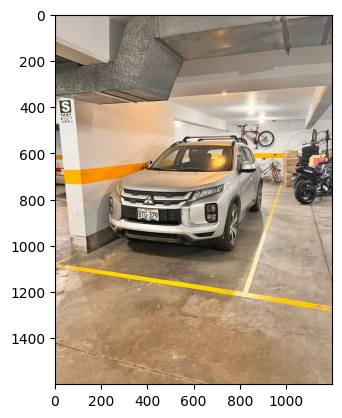

In [ ]:
# Image to predict
image_src = "/content/drive/MyDrive/peru_plates_recognition/car.jpeg"

# Plot the image
img = mpimg.imread(image_src)
plt.imshow(img)
plt.show()

In [ ]:
# Load the trained YOLO model
model = YOLO('/content/drive/MyDrive/peru_plates_recognition/runs/detect/train8/weights/best.pt')

# Predict the license plate in the image
results = model.predict(source=image_src, imgsz=640)


image 1/1 /content/drive/MyDrive/peru_plates_recognition/car.jpeg: 640x480 1 placa, 13.7ms
Speed: 2.9ms preprocess, 13.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
results = model(image_src)


image 1/1 /content/drive/MyDrive/peru_plates_recognition/car.jpeg: 640x480 1 placa, 14.1ms
Speed: 3.5ms preprocess, 14.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


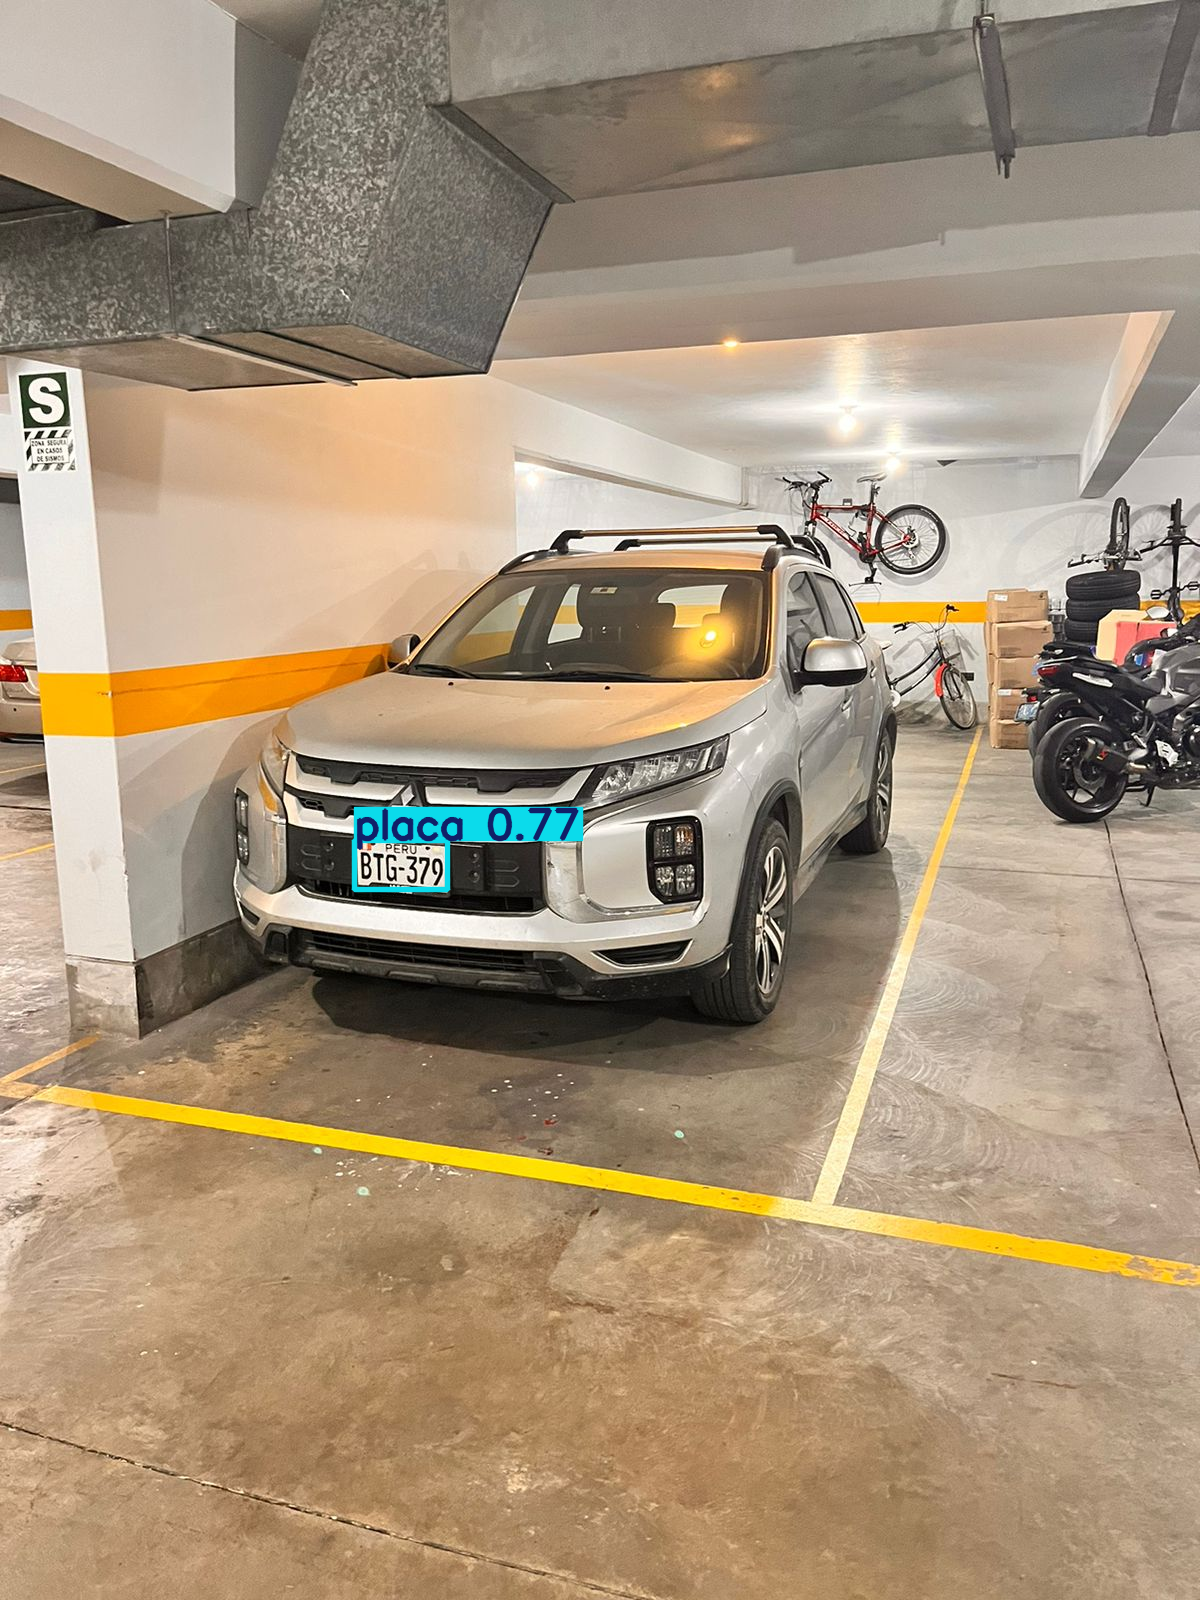

In [ ]:
# Visualize the results
for result in results:
    result.show()

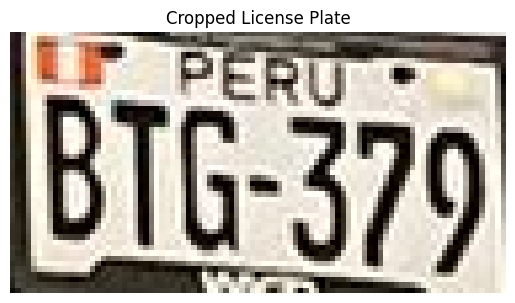

Detected License Plate Number: BTG-379


In [ ]:
for result in results:
    boxes = result.boxes.xyxy  # Bounding boxes in [x_min, y_min, x_max, y_max] format

    # Load the original image
    image = cv2.imread(image_src)

    # Iterate through each detection and crop the license plate
    for i, box in enumerate(boxes):
        x_min, y_min, x_max, y_max = map(int, box)
        cropped_plate = image[y_min:y_max, x_min:x_max]

        # Display the cropped plate for verification
        plt.imshow(cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Cropped License Plate')
        plt.show()

        # Save the cropped plate image
        plate_path = f"cropped_plate_{i}.jpg"
        cv2.imwrite(plate_path, cropped_plate)

        # Convert the cropped plate to grayscale for better OCR results
        gray_plate = cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2GRAY)

        # Step 2: Use Tesseract OCR to Extract Text from the Cropped Plate
        plate_number = pytesseract.image_to_string(gray_plate, config='--psm 8')  # Use '--psm 8' for single word/line
        print(f"Detected License Plate Number: {plate_number.strip()}")